In [1]:
## Plots for loop tests for which all subcats have the same number of a single LID
## to be used with results from Wingo_PWD_Simulations.ipynb


### Show the collections that have been generated

In [2]:
from pymongo import MongoClient

#  IMPORTANT:  Set these for each run:
#################################################
# mongoServer = None   # use the local mongodb server installed on your computer
#mongoServer = 'mongodb://server.mcgarity.info:27017/'  # Art's personal server
#mongoServer = 'mongodb://ubuntu:27017/'  # ubuntu Linux virtual machine on Art's Mac
mongoServer = 'mongodb://aws-2.greenphilly.net:27017/'  # aws-2 server for GreenPhilly
database = "jcohen4"
username = "jcohen4"
password = "wingohocking"
authenticationDatabase = "jcohen4"
collection = 'random_multivariate250'
client = MongoClient(mongoServer)
################################################

db = client[database]
db.authenticate(username, password, source=authenticationDatabase)  # pass credentials to database
collectionNames = sorted(db.collection_names())
collectionNames

[u'2008',
 u'2008trial1',
 u'2008trial3',
 u'2008trial4',
 u'2008trial6',
 u'first_wingo_test',
 u'fourth_wingo_test',
 u'impervFixed',
 u'impervNotFixed',
 u'july',
 u'july10',
 u'july12',
 u'july13',
 u'july14',
 u'july15',
 u'july16',
 u'july17',
 u'july2',
 u'july21',
 u'july22',
 u'july23',
 u'july24',
 u'july3',
 u'july4',
 u'july5',
 u'july6',
 u'july7',
 u'july8',
 u'july9',
 u'largeTrialLinier',
 u'randomTrial1',
 u'randomTrial2',
 u'randomTrial4',
 u'randomTrial5',
 u'random_multivariate',
 u'random_multivariate2',
 u'random_multivariate2009',
 u'random_multivariate2009year',
 u'random_multivariate2010',
 u'random_multivariate2012year',
 u'random_multivariate250',
 u'random_multivariate3',
 u'random_multivariate5',
 u'random_multivariate6',
 u'random_multivariate7',
 u'random_multivariate8',
 u'random_multivariate9',
 u'second_wingo_test',
 u'trialWith%Perv',
 u'trialWith%Perv2',
 u'y16m10d11_demonstrate_runswmm_on_aws-2']

Sewer Outflow Plot

[0.0, 50908990.797683954, 32760472.051656723, 46580343.76461649, 49410410.74556458, 45331302.63891637, 37784401.25248957, 55362989.65244472, 51530774.61229217, 52110339.120072246, 27742218.32134807, 39383598.038868666, 40430725.716780424, 42869750.75888419, 39802007.46013212, 50856861.29796028, 27582396.263497233, 31170027.473676324, 36954395.66757536, 53188691.984568596, 48324315.542868614, 29780021.9329921, 60344941.91529703, 36331871.2814883, 41635877.88358843, 56747440.90702891, 44765761.861980915, 44415067.603860974, 40633608.63996065, 20566349.978868604, 36448289.118144274, 35866893.37906861, 52262573.68648815, 31150361.934648514, 54400206.33363652, 48921485.45446861, 32968168.689456344, 39552414.67396796, 35694313.29435587, 54539130.81081653, 39559766.52902436, 40492267.206768036, 39864026.95534825, 39155683.799664974, 42829564.657392144, 53268963.20053232, 32624213.631804824, 39222113.061419845, 47887162.930692434, 30577280.79355216, 35662879.401265144, 53843222.52352822, 46034

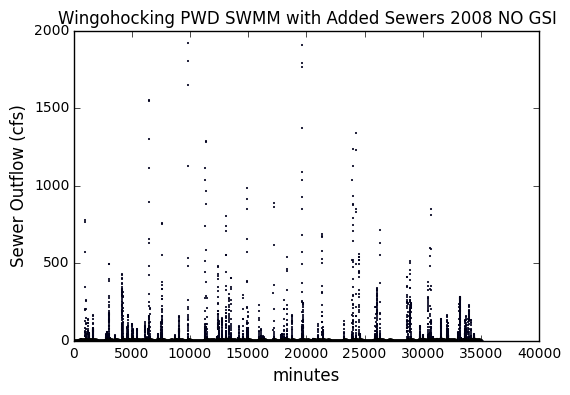

In [3]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from get_cso import * 
from process_collection import * 
import matplotlib.pyplot as plt

collectionName = collection #from cell above
ratio = 0.05
numSubcatch = 7
results = volume_reduction_and_runoff_volume_vs_lid_number(collectionName, numSubcatch, db)
csoResults = cso_reduction(collectionName, ratio, numSubcatch, results) 

outflow_no_lid = results["outflow_series"][0]
outflow_no_lid_volume = sum(outflow_no_lid)*900*7.48052 #convert to gallons, 900 seconds in 15 minutes
length = len(outflow_no_lid)
x = range(0,length)
(fig, ax1) = plt.subplots()
plt.title("Wingohocking PWD SWMM with Added Sewers 2008 NO GSI")
ax1.plot(x,outflow_no_lid,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("minutes",fontsize=12)
ax1.set_ylabel("Sewer Outflow (cfs)",fontsize=12)
#plt.savefig('wingo_sewer_outflow_1_year.jpg')


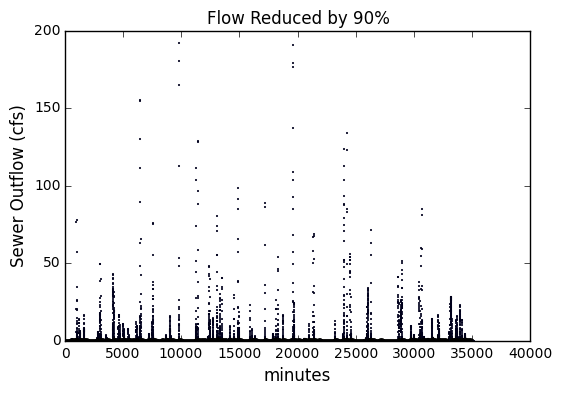

In [4]:
# Scale Sewer Outflow to mimic GSI and plot results
def scale_flow(outflow_values, scale_factor):
    reduced_flow = []
    for flow in outflow_values:
        reduced_flow.append(flow*scale_factor)
    return reduced_flow
reduced_flow = scale_flow(outflow_no_lid,0.1)
length = len(reduced_flow)
#print reduced_flow
x = range(0,length)
(fig, ax1) = plt.subplots()
plt.title("Flow Reduced by 90%")
ax1.plot(x,reduced_flow,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("minutes",fontsize=12)
ax1.set_ylabel("Sewer Outflow (cfs)",fontsize=12)

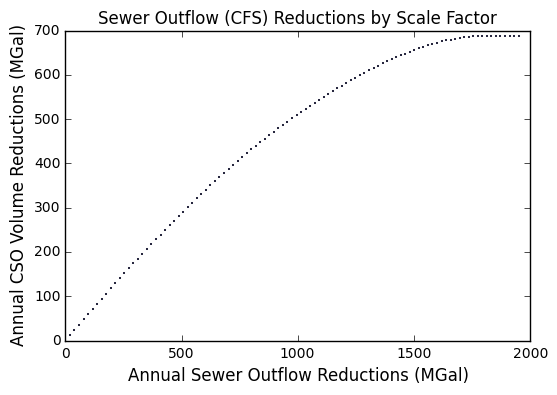

In [5]:
# Generate plot of CSO reductions as no_lid flows are scaled down
import numpy as np
from get_cso import * 
x = []
y = []
treatment_ratio = 0.05  # CFS/impervious acre for Philadelphia CSO area
cso_results = calculate_cso(outflow_no_lid,treatment_ratio)
cso_no_lid_volume = cso_results["cso_volume"]
for reduction in np.arange(0,1.01,0.01):
    scale_factor = 1.0-reduction
    reduced_flow = scale_flow(outflow_no_lid,scale_factor)
    #outflow_scaled_volume = sum(reduced_flow)*900*7.48052 #convert to gallons, 900 seconds in 15 minutes
    cso_results = calculate_cso(reduced_flow,treatment_ratio)
    outflow_scaled_volume = cso_results["tot_volume"]
    outflow_annual_reduction = outflow_no_lid_volume - outflow_scaled_volume
    cso_scaled_volume = cso_results["cso_volume"]
    cso_annual_reduction = cso_no_lid_volume - cso_scaled_volume
    #x.append(1.0 - scale_factor)  #  to plot versus fractional flow reduction
    x.append(outflow_annual_reduction/1e6)  # plot in million gallons
    y.append(cso_annual_reduction/1e6)         # plot in million gallons
    
(fig, ax1) = plt.subplots()
plt.title("Sewer Outflow (CFS) Reductions by Scale Factor")
ax1.plot(x,y,'ko',color = 'b',markersize = 1)
#ax1.set_xlabel("Fractional Flow Reduction",fontsize=12)
ax1.set_xlabel("Annual Sewer Outflow Reductions (MGal)",fontsize=12)
ax1.set_ylabel("Annual CSO Volume Reductions (MGal)",fontsize=12)    

In [6]:
print cso_no_lid_volume
print cso_scaled_volume

687453499.127
0.0


r-squared: 0.998897796805


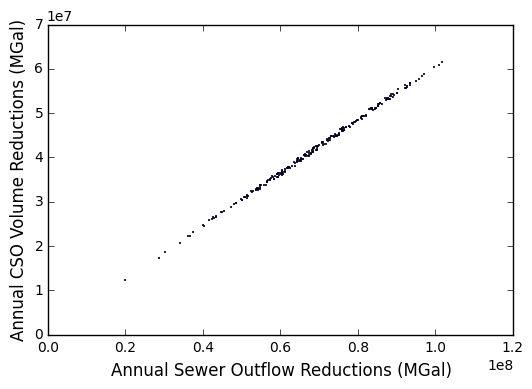

In [7]:
# generates plot of cso reduction
cso_list = []
tot_vol_list = []
cso_reduction_list = []
vol_reduction_list = []
sims = len(results["outflow_series"])
for i in range(0,sims):
    cso = calculate_cso(results["outflow_series"][i],0.05)
    cso_list.append(cso["cso_volume"])
    tot_vol_list.append(cso["tot_volume"])
    #reduction = cso["tot_volume"] - cso["cso_volume"]
    #reduction_list.append(reduction)
for i in range(0,sims):
    original_cso_volume = cso_list[0]  #cso from run with no lids
    original_volume = tot_vol_list[0]  #cso from run with no lids   
    cso_reduction = original_cso_volume - cso_list[i] 
    vol_reduction = original_volume - tot_vol_list[i]
    cso_reduction_list.append(cso_reduction)
    vol_reduction_list.append(vol_reduction)
#print cso_reduction_list
lid_num = range(0,len(cso_reduction_list))
(fig, ax1) = plt.subplots()
ax1.plot(vol_reduction_list,cso_reduction_list,'ko',color = 'b',markersize = 1)
#ax1.set_xlabel("Fractional Flow Reduction",fontsize=12)
ax1.set_xlabel("Annual Sewer Outflow Reductions (MGal)",fontsize=12)
ax1.set_ylabel("Annual CSO Volume Reductions (MGal)",fontsize=12)

from scipy import stats
import numpy as np
x = vol_reduction_list
y = cso_reduction_list
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print "r-squared:", r_value**2